## Import Libraries

In [46]:
from arcgis.gis import GIS

## Connect to _source_ and _target_ GIS organizations

In [ ]:
source = GIS(profile="your_online_admin_profile")
target = GIS(profile="webapps_admin")

In [ ]:
print(source)

In [ ]:
source.users.me.username

In [ ]:
print(target)

In [ ]:
target.users.me.username

## Search for a _Feature Layer_ to clone

In [52]:
ar_clinic_items = source.content.search(query="Arkansas Rural Clinics", 
                                        item_type="Feature Layer")
ar_clinic_items

[<Item title:"Arkansas Rural Clinics" type:Feature Layer Collection owner:weg_gis_user>]

<Item title:"Arkansas Rural Clinics" type:Feature Layer Collection owner:weg_gis_user>
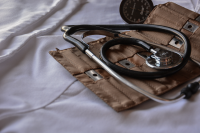

In [53]:
ar_clinic_flyr_item = ar_clinic_items[0]
ar_clinic_flyr_item

In [54]:
ar_clinic_flyr_item.id

'40ae05ea0cc84e13ad61a00ca869a2aa'

## Print information about the _Feature Layer_

In [55]:
print(f"{'Hosted Feature Layer:':35}{ar_clinic_flyr_item.title}\n{'-'*80}")
print(f"{' '*2}{'item id:':20}{ar_clinic_flyr_item.id}")
print(f"{' '*2}individual layer urls:")
for flyr in ar_clinic_flyr_item.layers:
    print(f"{' '*4}{flyr.url}")

Hosted Feature Layer:              Arkansas Rural Clinics
--------------------------------------------------------------------------------
  item id:            40ae05ea0cc84e13ad61a00ca869a2aa
  individual layer urls:
    https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Arkansas_Rural_Clinics/FeatureServer/0


## Clone item with `copy_data` set to False

In [56]:
try:
    if not target.content.folders.get("Arkansas_Data"):
        target.content.folders.create("Arkansas_Data")
    cloned_flyr_item = target.content.clone_items(items=[ar_clinic_flyr_item],
                                                  copy_data=False,
                                                  folder="Arkansas_Data")[0]
                                                  
except Exception as e:
    print("Failed to clone.")
    print(str(e))

In [57]:
print(f"{'Cloned Feature Layer:':35}{cloned_flyr_item.title}\n{'-'*80}")
print(f"{' '*2}{'item id:':20}{cloned_flyr_item.id}")
print(f"{' '*2}individual layer urls:")
for flyr in cloned_flyr_item.layers:
    print(f"{' '*4}{flyr.url}")

Cloned Feature Layer:              Arkansas Rural Clinics
--------------------------------------------------------------------------------
  item id:            2490f9cddd104806ea7236c285edba18
  individual layer urls:
    https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Arkansas_Rural_Clinics/FeatureServer/0


In [58]:
ar_clinic_flyr_item.owner

'weg_gis_user'

In [59]:
cloned_flyr_item.owner

'webapps_admin'

In [60]:
ar_clinic_flyr_item.layers[0].url == cloned_flyr_item.layers[0].url

True